# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import datetime
import pytz
import matplotlib.dates as mdates
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib import ticker
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
import scipy

import bb_rhythm.plotting
import bb_rhythm.utils
import bb_rhythm.rhythm

In [3]:
sns.set_style("ticks")
sns.set_palette(sns.color_palette("colorblind"))
matplotlib.rcParams.update({'font.size': 5, 'ytick.major.size': 1,
                            'ytick.major.width': 0.4, 'font.sans-serif': 'Arial'})

# Data

In [4]:
# cosinor fit data for period 2019
cosinor_df_2016 = pd.read_pickle("../../diurnal_rhythm_paper/data/dataframes/circadianess_2016/cosinor_3600.pkl")

# define bees being circadian with results of zero amplitude test being < 0.05
cosinor_df_2016["is_circadian"] = cosinor_df_2016.p_value < 0.05

In [5]:
# cosinor fit data for period 2019
cosinor_df_2019 = pd.read_pickle("../../diurnal_rhythm_paper/data/dataframes/circadianess_2019/cosinor_3600.pkl")

# define bees being circadian with results of zero amplitude test being < 0.05
cosinor_df_2019["is_circadian"] = cosinor_df_2019.p_value < 0.05

## Number of bees

In [11]:
palette = sns.color_palette()

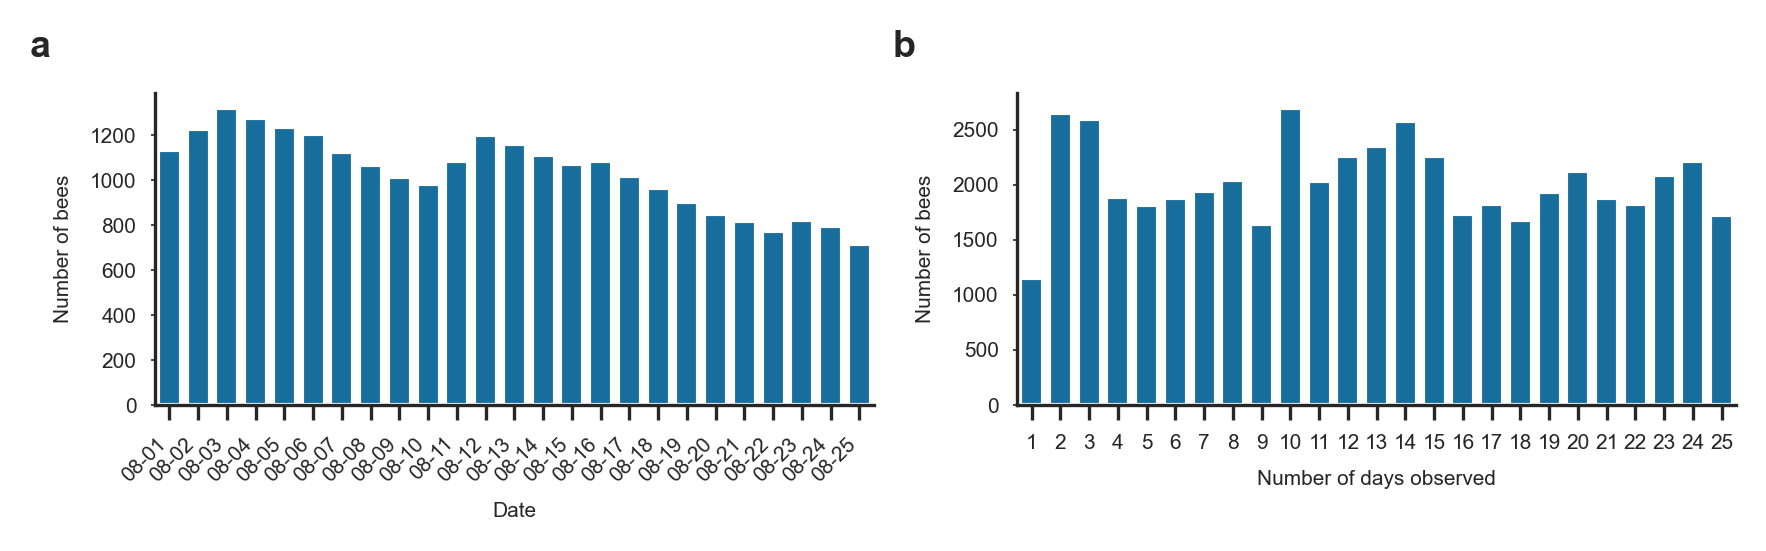

In [33]:
# create figure
fig, axs = plt.subplots(1, 2, figsize=(6.8, 1.35), dpi=300)

# plot number of bees per day
sns.barplot(data=cosinor_df_2016, x="date", y="bee_id", ax=axs[0], estimator="count", errorbar=None, color=palette[0])
axs[0].set(xlabel="Date", ylabel="Number of bees")
date_form = matplotlib.dates.DateFormatter("08-%d")
axs[0].xaxis.set_major_formatter(date_form)
axs[0].set_xticks(axs[0].get_xticks().tolist())
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
sns.despine(ax=axs[0])

# plot how many bees have been observed how many dates
sns.barplot(data=cosinor_df_2016.groupby("bee_id")["date"].count().reset_index(), y="bee_id", x="date", ax=axs[1], errorbar=None, color=palette[0])
axs[1].set(xlabel="Number of days observed", ylabel="Number of bees")
sns.despine(ax=axs[1])

# label subplots
labels=["a", "b"]
i = 0
for ax in axs.reshape(-1):
    trans = mtransforms.ScaledTranslation(-30/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, labels[i], transform=ax.transAxes + trans,
            fontsize='9', va='bottom', fontfamily='Arial', fontweight='bold')
    i += 1

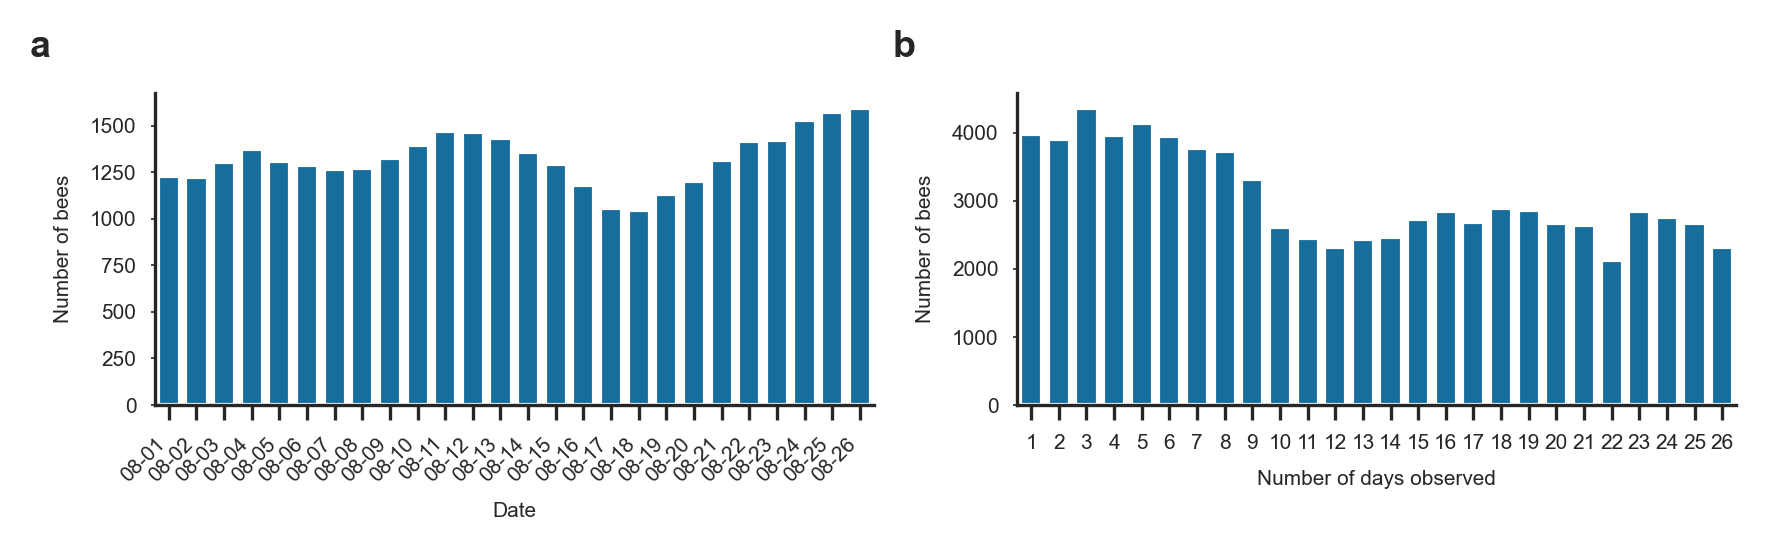

In [34]:
# create figure
fig, axs = plt.subplots(1, 2, figsize=(6.8, 1.35), dpi=300)

# plot number of bees per day
sns.barplot(data=cosinor_df_2019, x="date", y="bee_id", ax=axs[0], estimator="count", errorbar=None, color=palette[0])
axs[0].set(xlabel="Date", ylabel="Number of bees")
date_form = matplotlib.dates.DateFormatter("08-%d")
axs[0].xaxis.set_major_formatter(date_form)
axs[0].set_xticks(axs[0].get_xticks().tolist())
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
sns.despine(ax=axs[0])

# plot how many bees have been observed how many dates
sns.barplot(data=cosinor_df_2019.groupby("bee_id")["date"].count().reset_index(), y="bee_id", x="date", ax=axs[1], errorbar=None, color=palette[0])
axs[1].set(xlabel="Number of days observed", ylabel="Number of bees")
sns.despine(ax=axs[1])

# label subplots
labels=["a", "b"]
i = 0
for ax in axs.reshape(-1):
    trans = mtransforms.ScaledTranslation(-30/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, labels[i], transform=ax.transAxes + trans,
            fontsize='9', va='bottom', fontfamily='Arial', fontweight='bold')
    i += 1

## Share of rhythmic bees per age

In [59]:
# bar plot dataframe
df_bar_2016 = cosinor_df_2016.groupby(["age"]).agg(
    no=("is_circadian", lambda x: 100),
    yes=("is_circadian", lambda x: x.sum() / x.count() * 100),
).rename(columns={"yes": "Circadian", "no": "Non-circadian"}).reset_index()

df_bar_2019 = cosinor_df_2019.groupby(["age"]).agg(
    no=("is_circadian", lambda x: 100),
    yes=("is_circadian", lambda x: x.sum() / x.count() * 100),
).rename(columns={"yes": "Circadian", "no": "Non-circadian"}).reset_index()

In [74]:
palette = bb_rhythm.plotting.create_age_color_palette(
        sorted(df_bar_2016["age"].unique()), "age", df_bar_2016
    )

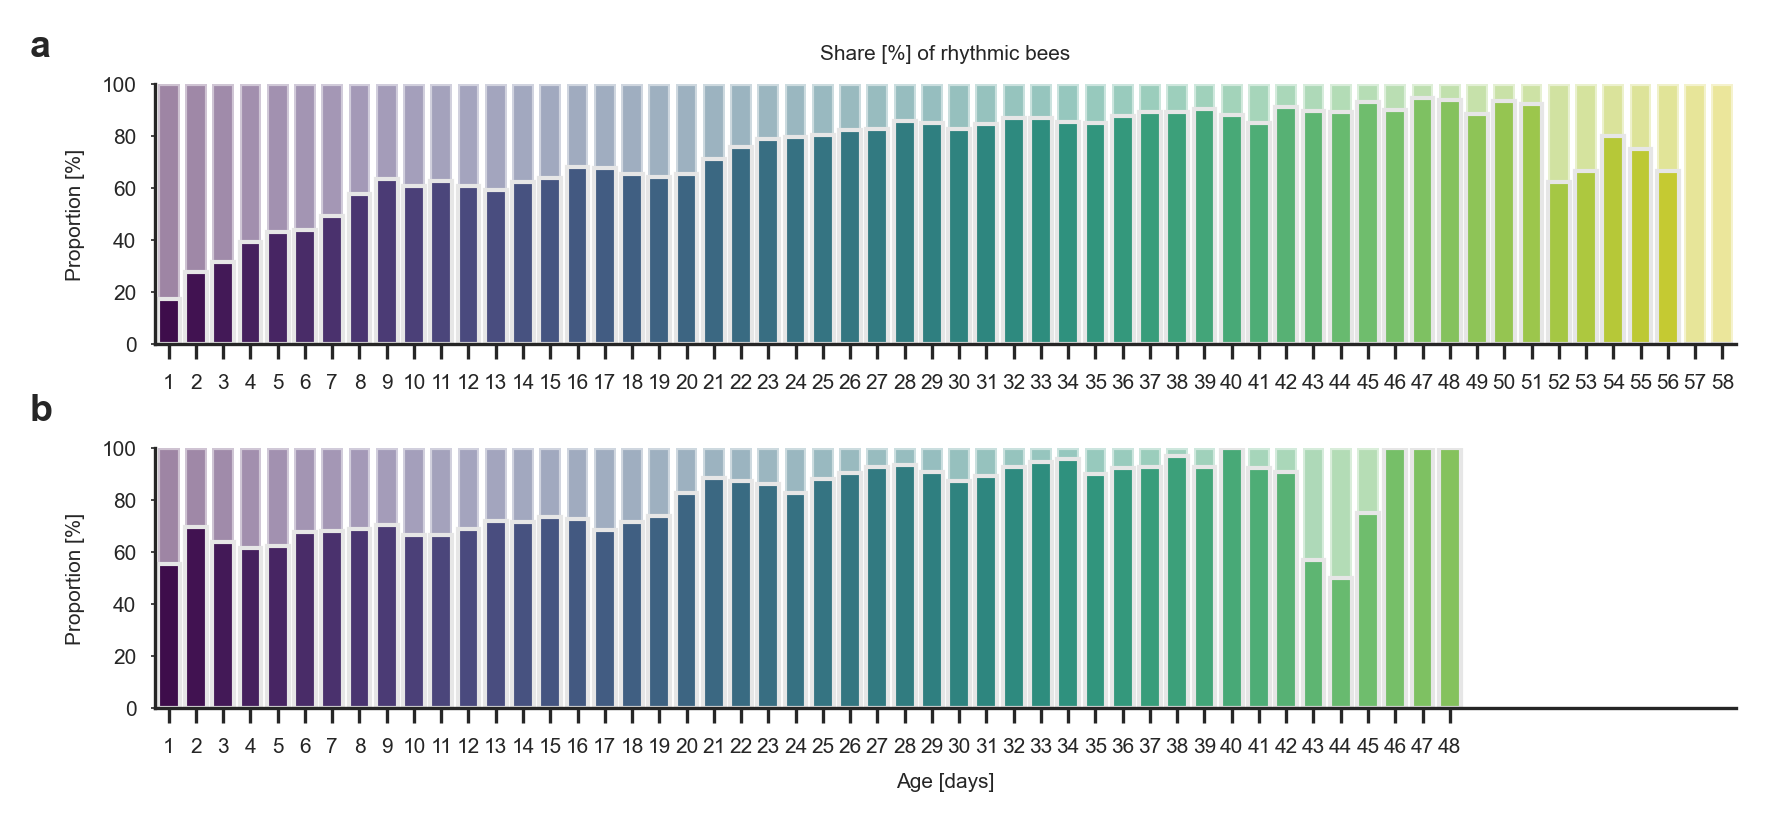

In [79]:
fig, axs = plt.subplots(2, 1, figsize=(6.8, 2.7), dpi=300, gridspec_kw={'hspace': 0.4}, sharey=True)

# barplot
sns.barplot(data=df_bar_2016, x="age", y="Non-circadian", ax=axs[0], palette=palette, alpha=0.5, orient="v")
sns.barplot(data=df_bar_2016, x="age", y="Circadian", ax=axs[0], palette=palette, orient="v", edgecolor=".9")

# x-axis settings
axs[0].set_xlabel("")

# y-axis settings
axs[0].set_ylabel("Proportion [%]")
axs[0].set_ylim(0, 100.0)

# figure settings
axs[0].set_title("Share [%] of rhythmic bees", fontsize=rcParams['axes.labelsize'])
sns.despine(ax=axs[0])
axs[0].grid(False)

# barplot
sns.barplot(data=df_bar_2019, x="age", y="Non-circadian", ax=axs[1], palette=palette, alpha=0.5, orient="v")
sns.barplot(data=df_bar_2019, x="age", y="Circadian", ax=axs[1], palette=palette, orient="v", edgecolor=".9")

# x-axis settings
axs[1].set_xlabel("Age [days]")
axs[1].set_xlim(-0.5, 57.5)

# y-axis settings
axs[1].set_ylabel("Proportion [%]")
axs[1].set_ylim(0, 100.0)

# figure settings
sns.despine(ax=axs[1])
axs[1].grid(False)

# add subplot labels
labels=["a", "b"]
i = 0
for ax in axs.reshape(-1):
    trans = mtransforms.ScaledTranslation(-30/72, 5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, labels[i], transform=ax.transAxes + trans,
            fontsize='9', va='bottom', fontfamily='Arial', fontweight='bold')
    i += 1